The lung cancer data used in this notebook
was published in :
          Hong, Z.Q. and Yang, J.Y. "Optimal Discriminant Plane for a Small
          Number of Samples and Design Method of Classifier on the Plane",
          Pattern Recognition, Vol. 24, No. 4, pp. 317-324, 1991.
        - Donor: Stefan Aeberhard, stefan _at_ coral.cs.jcu.edu.au
        - Date : May, 1992

    32 lines
    57 (1 class attribute, 56 predictive)
    attribute 1 is the class label.
        - All predictive attributes are nominal, taking on integer
          values 0-3
    Missing Attribute Values: Attributes 5 and 39 (*)
    (5 lines have missing data)

    9. Class Distribution:
        - 3 classes,
                1.)     9 observations
                2.)     13     "
                3.)     10     "

     reading the data into:
      y = column data 0, the class
      x = columns 1 through 56

The notebook is to explore fitting models that generalize well to test data. 

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

def calcDist(x0, x1):
    return math.sqrt(sum([(x0[i] - x1[i])**2 for i in range(len(x0))]))

def minMaxScaling(a):
    print(f"type={type(a)}\n")
    mina = min(a)
    rangea = max(a) - mina
    out = []
    for i in range(len(a)):
        out.append((a[i] - mina)/rangea)
    return out

def write_projected_to_file(proj, users_idx_to_id: dict, filename: str):
    csv_path2 = os.getcwd() + "/../../test/resources/" + filename
    with open(csv_path2, 'w', encoding="utf-8") as fp:
        #NOTE: i is uIdx in the projected matrix
        for i in range(len(proj)):
            line = f"{users_idx_to_id[i]},{proj[i][0]},{proj[i][1]}\n"
            _ = fp.write(line) # the _ captures the number of characters written.  if missing, that gets written to the CLI
        fp.close()



In [2]:
''' read in the data '''
csv_path = os.getcwd() + "/../../test/resources/ucl_ml_datasets/lung+cancer/lung-cancer_data.txt"

nRows = 32
nCols = 57

# labels are 1, 2, or 3
labels = []
labels_no_missing_data = []
# attributes have values  0-3
utility = []
utility_no_missing_data = []
missingValue = None # catboost understands N/A, NAN, NoneN/A, NAN, None

with open(csv_path) as fp:
    i = 0
    for line in fp:
        missing_data = False
        line = line.rstrip()
        if len(line) == 0:
            continue
        items = line.rsplit(",")
        x_i = []
        for j in range(1, len(items)):
            if items[j] == "?":
                x_i.append(missingValue)
                missing_data = True
            else:
                x_i.append(int(items[j]))
        labels.append(int(items[0]) - 1)
        utility.append(x_i)
        if not missing_data:
            labels_no_missing_data.append(int(items[0]) - 1)
            utility_no_missing_data.append(x_i)
        i += 1
    fp.close()

y = np.array(labels_no_missing_data)
X = np.array(utility_no_missing_data)
y0 = np.array(labels)
X0 = np.array(utility)

print(f'X.shape={X.shape}, y.shape={y.shape}\n')
print(f'X0.shape={X0.shape}, y0.shape={y0.shape}\n')

print(f'done reading in data\n')

X.shape=(27, 56), y.shape=(27,)

X0.shape=(32, 56), y0.shape=(32,)

done reading in data



## A look at SVD based projections of the data separated by labels, reduced to 2 dimensions

0 s=[40.74947664  6.29577416  4.81186265  4.09467767  3.67063187  3.2651686
  2.31593807  2.10345909]



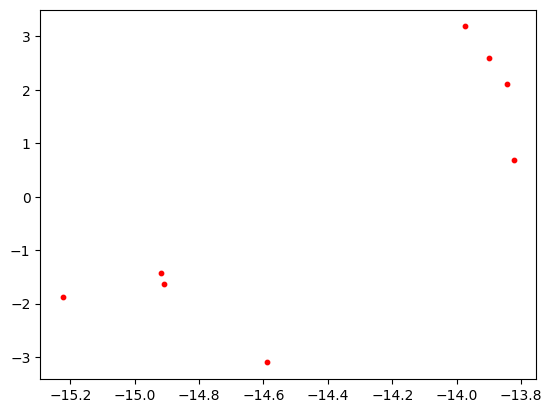

1 s=[43.25241679  5.80928818  5.08158973  4.88012914  4.62482867  4.30469475
  3.6134583   3.16877685  2.81159169  2.21803642]



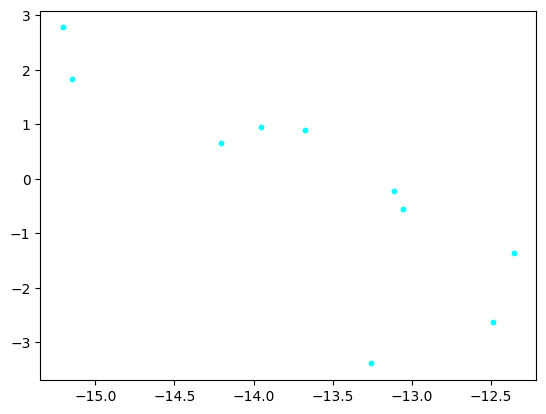

2 s=[41.89323932  6.3161442   5.36725908  4.76978425  4.10060893  3.49642097
  3.40231263  2.80591209  2.23957204]



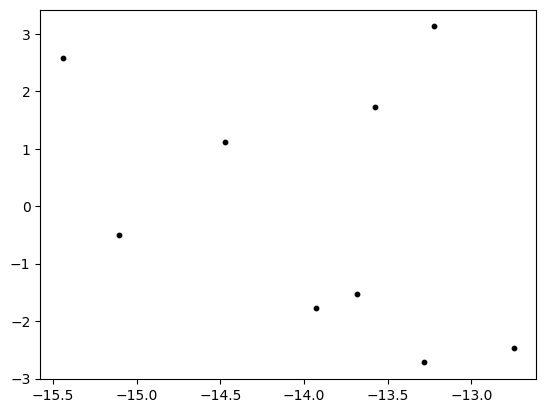

In [3]:
from scipy import linalg

# can see non-linearity in the individual label projections,
# so should consider a  nonlinear dimensionality reduction method.
p=2
clr = {0:'red', 1: 'cyan', 2:'black'}
vps = []
projs = []
for i in range(3):
    indices = y == i
    lmnd = y[indices]
    umnd = X[indices]
    U, s, Vh = linalg.svd(umnd)
    print(f'{i} s={s}\n')
    vp = Vh.T.copy()[:, 0:p]
    projected = np.matmul(umnd, vp)
    plt.scatter(projected[:,0], projected[:,1], s=10, color=clr[i])
    plt.show()
    vps.append(vp)
    projs.append(projected)



## A look at SVD based projection of data, reduced to 2 dimensions

s=[72.13455958  9.46386207  7.72091041  6.75346809  6.47903299  6.01602643
  5.55968427  5.37546843  4.95311595  4.86989157  3.94966496  3.81784701
  3.66035581  3.54406066  3.25177668  3.05968404  2.86141846  2.60421373
  2.52336053  2.24686865  2.09645093  2.02801034  1.63697713  1.45533736
  1.39472266  1.12843462  0.78338147]



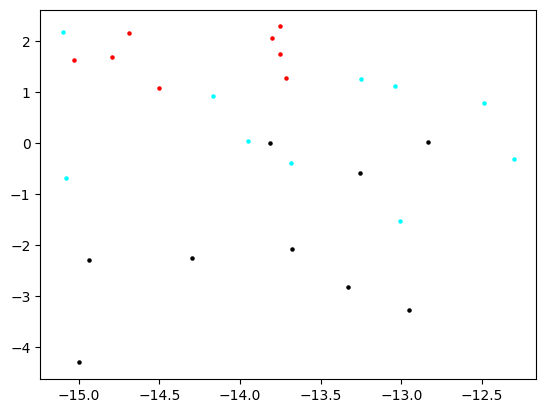

In [4]:
# the variance in the first singular value is very large compared to the remaining,
# but the projection does not show clear segmentation

U, s, Vh = linalg.svd(X)
print(f's={s}\n')
'''s=[72.13455958  9.46386207  7.72091041  6.75346809  6.47903299  6.01602643
  5.55968427  5.37546843  4.95311595  4.86989157  3.94966496  3.81784701
  3.66035581  3.54406066  3.25177668  3.05968404  2.86141846  2.60421373
  2.52336053  2.24686865  2.09645093  2.02801034  1.63697713  1.45533736
  1.39472266  1.12843462  0.78338147]'''

vp = Vh.T.copy()[:, 0:p]
projected = np.matmul(X, vp)
for i in range(3):
    indices = y == i
    xp = projected[:,0]
    xp = xp[indices]
    yp = projected[:,1]
    yp = yp[indices]
    plt.scatter(xp, yp, s=5, color=clr[i])

plt.show()


To use CatBoost or LightGBM below, we split the data into train and test.
If we had enough data we would split it into train, dev, and test.

For such a small dataset, we use 80% train, 20% test.
We have 3 labels, so we choose 80% from each for train, and the rest for test.


In [5]:
_X = X0 # X0, y0 replace missing values with None, which CatBoost handles
_y = y0
x_train = []
x_test = []
y_train = []
y_test = []
for i in range(3):
    indices = _y == i
    xp = _X[indices]
    tr_indices = np.random.choice(xp.shape[0], int(xp.shape[0] * 0.8), replace=False)
    te_indices = np.array(list(set([i for i in range(len(xp))]) - set(tr_indices)))
    x_train.extend(xp[tr_indices].tolist())
    x_test.extend(xp[te_indices].tolist())
    for _ in range(xp[tr_indices].shape[0]):
        y_train.append(i)
    for _ in range(xp[te_indices].shape[0]):
        y_test.append(i)

x_train = np.array(x_train)
x_test = np.array(x_test)
print(f'X.shape={_X.shape}, lengths={len(_X)}, {len(_X[0])}\n')
print(f'x_train.shape={x_train.shape}, lengths={len(x_train)}, {len(x_train[0])}\n')
print(f'x_test.shape={x_test.shape}, lengths={len(x_test)}, {len(x_test[0])}\n')
print(f'len(x_train)={len(x_train)}, len(y_train)={len(y_train)}\n')
print(f'len(x_test)={len(x_test)}, len(y_test)={len(y_test)}\n')
print(f'done splitting into train and test\n')

X.shape=(32, 56), lengths=32, 56

x_train.shape=(25, 56), lengths=25, 56

x_test.shape=(7, 56), lengths=7, 56

len(x_train)=25, len(y_train)=25

len(x_test)=7, len(y_test)=7

done splitting into train and test



## A look at LocallyLinearEmbedding

X_transformed.shape=(27, 2)



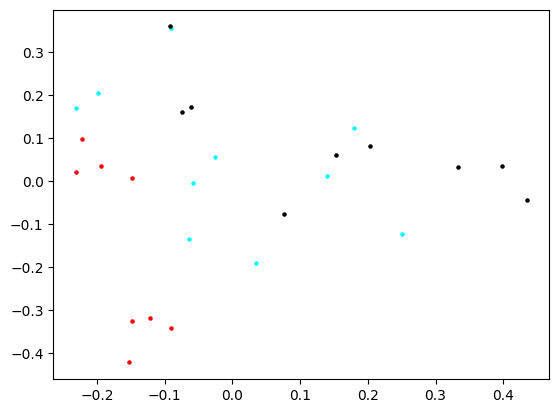

In [6]:
from sklearn.manifold import LocallyLinearEmbedding

p = 2
lle = LocallyLinearEmbedding(n_components=p)
X_transformed = lle.fit_transform(X, y)
print(f'X_transformed.shape={X_transformed.shape}\n')

#lle.get_feature_names_out()
#lle.get_params()

#plt.scatter(X_transformed[:,0], X_transformed[:,1], s=5, color=clr[i])   
#plt.show()

# show the different labels as different colors
for i in range(3):
    indices = y == i
    xp = X_transformed[:,0]
    xp = xp[indices]
    yp = X_transformed[:,1]
    yp = yp[indices]
    plt.scatter(xp, yp, s=5, marker='o', color=clr[i])

plt.show()

## A look at T-SNE

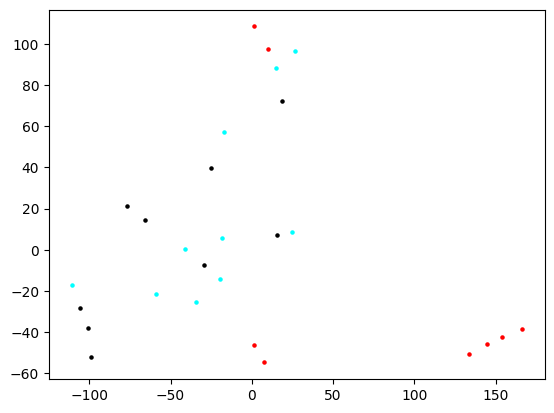

In [7]:
from sklearn.manifold import TSNE

#init='random'
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', 
                  method='exact', perplexity=2).fit_transform(X)
X_embedded.shape

for i in range(3):
    indices = y == i
    xp = X_embedded[:,0]
    xp = xp[indices]
    yp = X_embedded[:,1]
    yp = yp[indices]
    plt.scatter(xp, yp, s=5, marker='o', color=clr[i])

plt.show()

## A look at CatBoost, which is supervised machine learning (uses the labels)

Helpful in using CatBoost and Shap was this tutorial "CatBoost regression in 6 minutes" by Simon Thiesen: https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329

CatBoost is a gradient boosting machine learning library to solve for categorical features
using oblivious decision trees.  It can handle numerical, categorical, and text feature data.

A few notes about Boosting and ensemble methods from 
Kevin Murphy's 1st book "Probalistic Machine Learning: An Introduction" and from Stanford CS 229 Machine Learning lecture notes.

Ensemble learning is averaging multiple models to reduce the bias and/or variance.
For binary classification, majority vote is often used instead of averaging.
Note that weighted averaging is called "Stacking".

Ensemble learning combine a set of weak learner to create a strong learner that obtains better performance than a single one.

Definitions of weak and strong learners:
   * Weak learners 
       a.k.a. Weak Classifiers: 
       a classifier that achieves slightly better than 50 percent accuracy.
       these are models that perform slightly better than random guessing.
   * Strong learners: 
       models that have arbitrarily good accuracy.

There are many ways to ensemble models in machine learning, 
such as Bagging, Boosting, and Stacking.

Boosting decreases bias, not variance.
Boosting is more suitable for data with low variance, high bias, and high
noise, as it can reduce underfitting and increase accuracy.

As an aside, the subnetwork referred to as a "Residual Block" is an example used in 
Stacking.

Also as an aside, Bagging (Bootstrap Aggregation) is a method of merging the same type of predictions.
Bagging decreases variance, not bias, and solves over-fitting issues in a
model.   The RandomForest method is an example of Bagging.

More regarding CatBoost from [dataaspirant](https://dataaspirant.com/catboost-algorithm/)
and (towardsdatascience)[https://towardsdatascience.com/introduction-to-gradient-boosting-on-decision-trees-with-catboost-d511a9ccbd14]:

The boosting tree features used in a split are chosen to maximize the split score accuracy which 
includes a penalty function.
The boosting trees are oblivious and balanced trees wherein the same split criterion 
is used across a level.  The feature-split pair chooses a leaf and this is repeated until
the leaves reach the tree depth.

And from (Bard)[https://bard.google.com] when asked to summarize leaf growth in CatBoost:

Leaf growth in CatBoost: A summary

Leaf growth in CatBoost refers to the process of building the decision tree at the heart of the model. Here's a breakdown of the key points:

Tree growing methods:

* SymmetricTree: Default approach, builds levels sequentially with fixed splits for all leaves. Fast and often effective, but less flexible than other options.
* Depthwise: Expands by splitting non-terminal leaves with the best loss improvement. More adaptable but not as fast as SymmetricTree.
* Lossguide: Grows leaf by leaf, choosing the non-terminal with the highest gain. Most flexible but not supported for certain analysis methods.

Splitting criteria:

* Minimizes a penalized loss function like cross-entropy or MAE. Penalty terms like L2 regularization prevent overfitting.
* Best split is chosen based on the improvement it brings to the overall loss.

Leaf size limitations:

* min_data_in_leaf: Minimum number of samples allowed in a leaf, controls complexity and prevents noise impact.
* max_leaves: Sets the maximum number of leaves in the tree, another way to control model complexity.

Additional factors:

* Bootstrap aggregation (bagging): Ensembles multiple trees (built on different subsets of data) for better accuracy and robustness.
* Tree depth: Deeper trees can capture more complex relationships but risk overfitting.

Understanding leaf growth is crucial for:

* Tuning CatBoost parameters effectively.
* Interpreting the decision tree's structure and decision rules.
Analyzing model complexity and preventing overfitting.

Further resources:

CatBoost documentation on tree growing policies: https://catboost.ai/docs/concepts/parameter-tuning
Parameter tuning guide: https://catboost.ai/docs/concepts/parameter-tuning
Understanding the CatBoost algorithm: https://medium.com/@harshitaaswani2002/practical-applications-of-catboost-in-data-science-a99f6ff12d00


In [8]:
from catboost import CatBoostClassifier, Pool
import shap

# there are 56 features
nd = int(np.sqrt(x_train.shape[1]))

cat_features = [0,1,2] #this is needed when they're categorical, e.g. ['a','b','c']
loss_f = 'MultiClass'
#loss_f = 'logloss' #default
#l2_leaf_reg = 8 #default is 3
#depth=6 #default
model = CatBoostClassifier(learning_rate=0.03, loss_function=loss_f, metric_period=100,
                          classes_count=3)

#bootstrap_type='Regularization'
# helpful: https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329

# CAVEAT: larger depth can lead to overfitting
grid_params = {'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid_params, x_train, y_train, verbose=True, plot=True)
#model.fit(x_train, y_train, verbose=True, plot=True)

print(f'trained model params={model.get_params()}')

print(f'done training CatBoostClassifier\n')


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0831518	test: 1.0894429	best: 1.0894429 (0)	total: 66.3ms	remaining: 1m 6s
100:	learn: 0.4758422	test: 1.0505729	best: 1.0505729 (100)	total: 150ms	remaining: 1.33s
200:	learn: 0.1987430	test: 1.1222522	best: 1.0505729 (100)	total: 237ms	remaining: 943ms
300:	learn: 0.0981035	test: 1.1320973	best: 1.0505729 (100)	total: 340ms	remaining: 790ms
400:	learn: 0.0539767	test: 1.1193663	best: 1.0505729 (100)	total: 383ms	remaining: 572ms
500:	learn: 0.0349866	test: 1.1049048	best: 1.0505729 (100)	total: 420ms	remaining: 418ms
600:	learn: 0.0240011	test: 1.0823655	best: 1.0505729 (100)	total: 456ms	remaining: 303ms
700:	learn: 0.0178944	test: 1.0696521	best: 1.0505729 (100)	total: 496ms	remaining: 211ms
800:	learn: 0.0138730	test: 1.0774706	best: 1.0505729 (100)	total: 529ms	remaining: 131ms
900:	learn: 0.0111687	test: 1.0536662	best: 1.0505729 (100)	total: 578ms	remaining: 63.5ms
999:	learn: 0.0092882	test: 1.0472320	best: 1.0472320 (999)	total: 614ms	remaining: 0us

bestTest = 1.

In [9]:
sorted_feature_importance = model.feature_importances_.argsort()
print(f'sorted_feature_importance={sorted_feature_importance}\n')

sorted_feature_importance=[ 0 21 47 46 42 16 54 48  6 23 20 10 41  8 17 35 39 15  4 25 49 43 38 37
 44 45 30 53 24 29 27 50 51 28 11  9 40 31 14 13 55 32 36  2 12 34  5 33
  7 26  3 22 19 18  1 52]



true=0, predicted=[0],  prob=[0.92178863 0.06805396 0.01015741]
true=0, predicted=[1],  prob=[0.33903908 0.5833886  0.07757232]
true=1, predicted=[1],  prob=[0.00689459 0.96564581 0.0274596 ]
true=1, predicted=[2],  prob=[0.10791881 0.23660508 0.65547611]
true=1, predicted=[0],  prob=[0.94867078 0.02263846 0.02869076]
true=2, predicted=[2],  prob=[0.00302968 0.00994622 0.9870241 ]
true=2, predicted=[2],  prob=[0.03420315 0.26057816 0.70521869]
RMSE: 0.65
R2: 0.25
Substantial, moderate and weak R^2 scores respectively are 0.75, 0.50, and 0.25


With such a small dataset, the difference between the dataset with entries removed if they were missing values, and the dataset that replaced missing values with None affects the ability to predict class 1 (out of 0,1,2). The R2 is ~ 0.5 for the missing values dataset and is ~0.75 for the dataset with None for missing values.



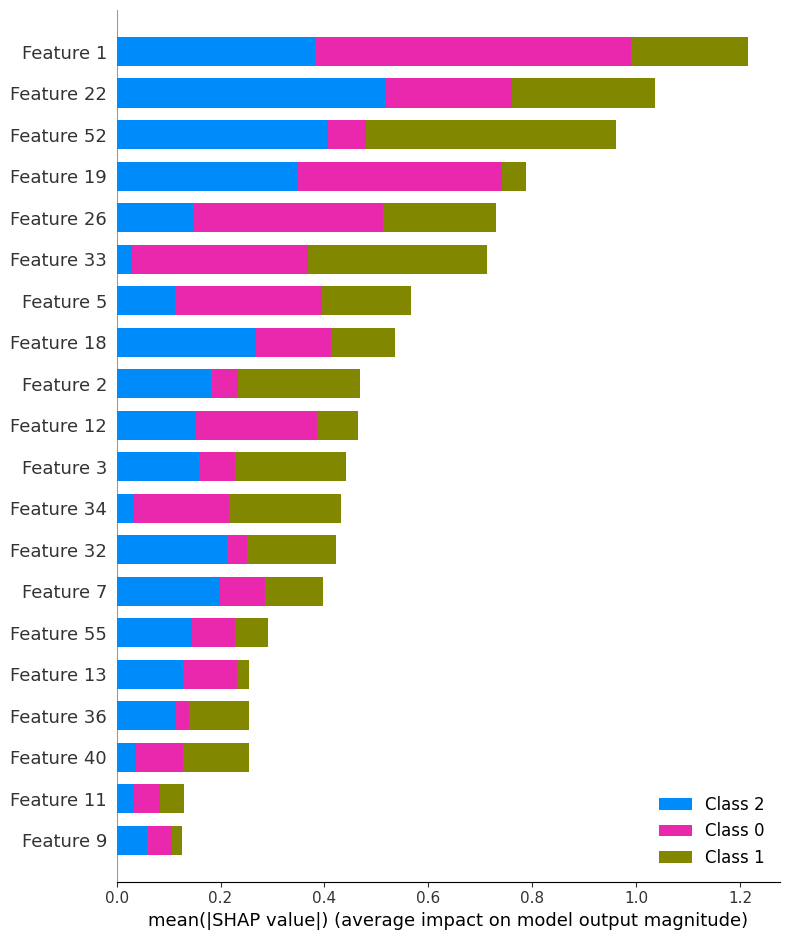

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred_test = model.predict(x_test)
y_proba_test = model.predict_proba(x_test)
assert(len(y_pred_test) == len(y_test))
for i in range(len(y_test)):
    print(f'true={y_test[i]}, predicted={y_pred_test[i]},  prob={y_proba_test[i]}')

rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
# this from Google generative AI:
print(f'Substantial, moderate and weak R^2 scores respectively are 0.75, 0.50, and 0.25\n')

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


## CatBoostRegressor

In [11]:
from catboost import CatBoost, CatBoostRegressor

# used to compare models, but can be run for a single model:
'''
param = {'iterations':500, 'learning_rate':0.03, 'loss_function':loss_f, 'metric_period':100,
                          'classes_count':3}
model = CatBoost(param)
model.fit(x_train, y_train, verbose=True, plot=True)

print(f'done training CatBoost\n')

preds_class = model.predict(x_test, prediction_type='Class')
preds_proba = model.predict(x_test, prediction_type='Probability')
preds_raw_vals = model.predict(x_test, prediction_type='RawFormulaVal')
print("Class", preds_class)
print("Proba", preds_proba)
print("Raw", preds_raw_vals)

print(f'done testing with CatBoost\n')
'''
'''
loss function choices:
 |      'RMSE' <-- default
 |      'MAE'  <-- Mean Absolute  Error
 |      'Quantile:alpha=value'
 |      'LogLinQuantile:alpha=value'
 |      'Poisson'
 |      'MAPE'   <-- Mean Absolute Percentage Error
 |      'Lq:q=value'
 |      'SurvivalAft:dist=value;scale=value'
 '''
loss_f = 'RMSE'

nd = int(x_train.shape[1]/3)

model = CatBoostRegressor(learning_rate=0.03, loss_function=loss_f, metric_period=100, verbose=True)

#CAVEAT: large tree depth can lead to overfitting
grid_params = {'learning_rate': [0.03, 0.1],
        'depth': [2, 3, 4, 6],
        'l2_leaf_reg': [0.01, 0.1, 1, 3, 6]}
model.grid_search(grid_params, x_train, y_train, verbose=True, plot=True)
#model.fit(x_train, y_train, plot=True)

sorted_feature_importance = model.feature_importances_.argsort()
print(f'sorted_feature_importance={sorted_feature_importance}\n')

print(f'trained model params={model.get_params()}')

print(f'done training CatBoostRegressor\n')


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.1991629	test: 1.5228280	best: 1.5228280 (0)	total: 2.84ms	remaining: 2.84s
100:	learn: 0.3290479	test: 0.7978643	best: 0.7978643 (100)	total: 89ms	remaining: 792ms
200:	learn: 0.1222051	test: 0.6985021	best: 0.6985021 (200)	total: 160ms	remaining: 636ms
300:	learn: 0.0491624	test: 0.6829296	best: 0.6829296 (300)	total: 273ms	remaining: 635ms
400:	learn: 0.0205856	test: 0.6870276	best: 0.6829296 (300)	total: 341ms	remaining: 509ms
500:	learn: 0.0088695	test: 0.6867829	best: 0.6829296 (300)	total: 376ms	remaining: 374ms
600:	learn: 0.0037586	test: 0.6882333	best: 0.6829296 (300)	total: 440ms	remaining: 292ms
700:	learn: 0.0017173	test: 0.6883983	best: 0.6829296 (300)	total: 496ms	remaining: 212ms
800:	learn: 0.0008157	test: 0.6883323	best: 0.6829296 (300)	total: 524ms	remaining: 130ms
900:	learn: 0.0003839	test: 0.6881889	best: 0.6829296 (300)	total: 550ms	remaining: 60.4ms
999:	learn: 0.0001779	test: 0.6881735	best: 0.6829296 (300)	total: 600ms	remaining: 0us

bestTest = 0.6

true=0, predicted=0.14138771566596697,  prob=[0.46471184 0.53528816]
true=0, predicted=0.5293711794144065,  prob=[0.37066356 0.62933644]
true=1, predicted=1.4730128162576401,  prob=[0.18648511 0.81351489]
true=1, predicted=1.2285671700102179,  prob=[0.2264323 0.7735677]
true=1, predicted=0.013493113012998492,  prob=[0.49662677 0.50337323]
true=2, predicted=1.9917989297076646,  prob=[0.12006667 0.87993333]
true=2, predicted=1.5859175224076927,  prob=[0.16995905 0.83004095]
RMSE: 0.50
R2: 0.57
substantial, moderate and weak R^2 scores respectively are 0.75, 0.50, and 0.25



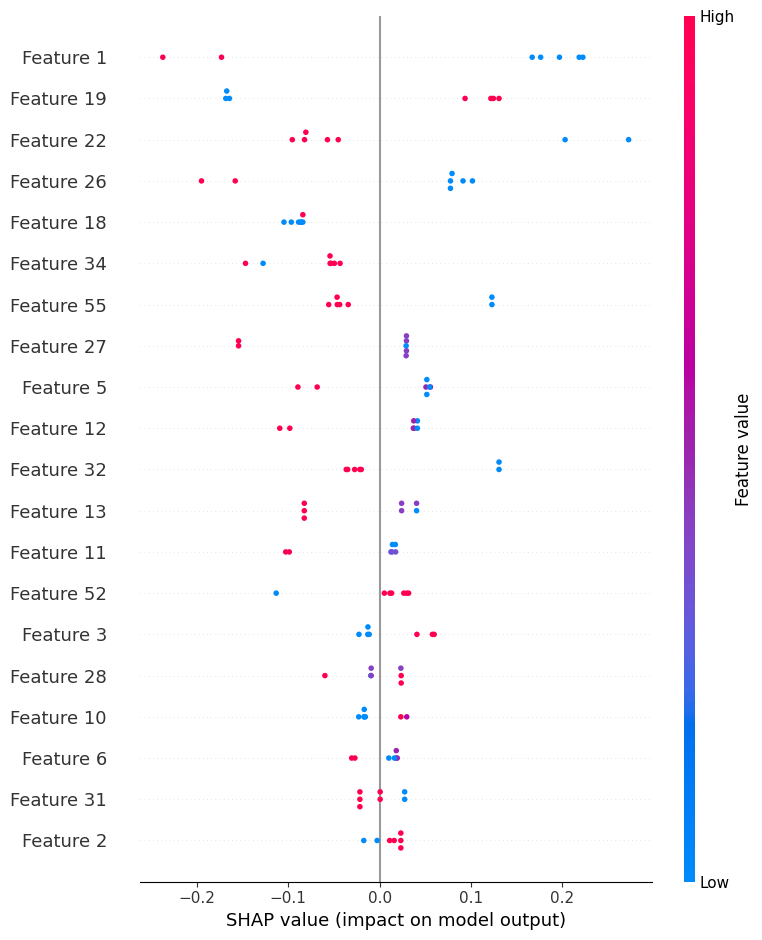

done with prediction on test dataset using CatBoostRegressor



In [12]:
prediction_type='RawFormulaVal' #default
prediction_type='Probability'
y_pred_test = model.predict(x_test, prediction_type='RawFormulaVal')
y_proba_test = model.predict(x_test, prediction_type='Probability')
assert(len(y_pred_test) == len(y_test))
for i in range(len(y_test)):
    print(f'true={y_test[i]}, predicted={y_pred_test[i]},  prob={y_proba_test[i]}')

rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
# this from Google generative AI:
print(f'substantial, moderate and weak R^2 scores respectively are 0.75, 0.50, and 0.25\n')

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

print(f'done with prediction on test dataset using CatBoostRegressor\n')


paused here... lightgbm next